Results for dataset diabetes
Results for dataset  1
RSME =  0.6467376415781433
MAE =  0.5478504512588268
R2_score =  -0.4478562281948204


Results for dataset  2
RSME =  0.46859991586714
MAE =  0.4126001819737721
R2_score =  0.10169412256535648


Results for dataset  3
RSME =  0.5260349878620085
MAE =  0.4419479779582142
R2_score =  0.5932171055380462


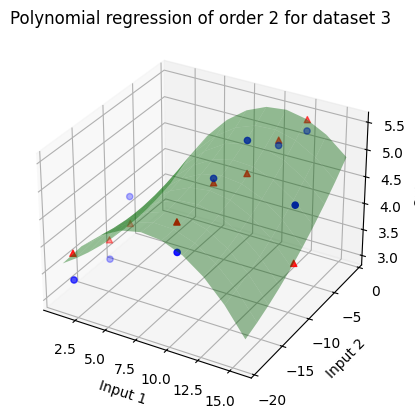

Results for dataset  4
RSME =  0.4937136056177162
MAE =  0.402301375976717
R2_score =  0.42898243192492935


Results for dataset  5
RSME =  0.6013926476877521
MAE =  0.4816623700533394
R2_score =  0.47583606276393486


Results for dataset plastic
Results for dataset  1
RSME =  1.5456797372834918
MAE =  1.24352012604518
R2_score =  0.8025285038950811


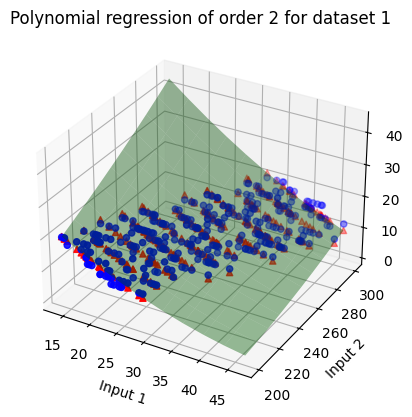

Results for dataset  2
RSME =  1.5286452114164049
MAE =  1.2090424955360486
R2_score =  0.8021631840585779


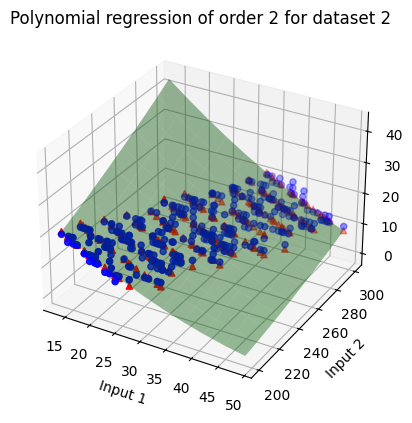

Results for dataset  3
RSME =  1.4638225889799792
MAE =  1.1810293214417544
R2_score =  0.8147140623825417


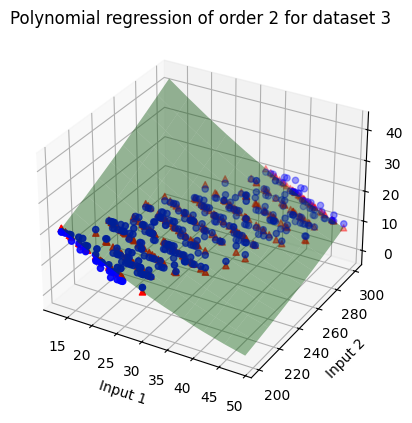

Results for dataset  4
RSME =  1.5954242047362293
MAE =  1.2717360948386258
R2_score =  0.7838795965912136


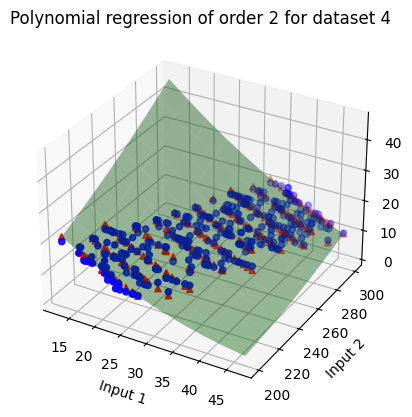

Results for dataset  5
RSME =  1.5007082269184966
MAE =  1.2235941236273704
R2_score =  0.7930004048249522


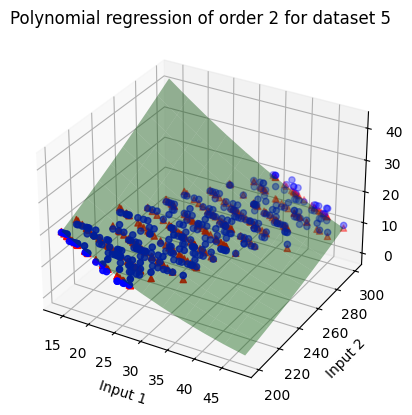

Avg RSME = 1.5268559938669202
Avg MAE = 1.225784432297796
Avg R2_SCORE = 0.7992571503504733


In [3]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures

#Importing dataset
datasets = ["diabetes","plastic"]
for j in datasets:
  rsmeList=[]
  maeList=[]
  r2List=[]
  print(f"Results for dataset {j}")
  for i in range(1,6):
    training = pd.read_csv(f"{j}-5-{i}tra.dat", header=None)
    testing = pd.read_csv(f"{j}-5-{i}tst.dat", header=None)

    X_train=training.iloc[: , :-1]
    Y_train=training.iloc[: , -1]

    X_test=testing.iloc[: , :-1]
    Y_test=testing.iloc[: , -1]

    poly_reg = PolynomialFeatures(degree = 2)
    X_poly_train = poly_reg.fit_transform(X_train)
    X_poly_test = poly_reg.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_poly_train, Y_train)
    y_pred=regressor.predict(X_poly_test)

    rsme=math.sqrt(mean_squared_error(Y_test,y_pred))
    mae=mean_absolute_error(Y_test,y_pred)
    r2=r2_score(Y_test,y_pred)

    rsmeList.append(rsme)
    maeList.append(mae)
    r2List.append(r2)

    print("Results for dataset ", i)
    print("RSME = " , rsme)
    print("MAE = " , mae)
    print("R2_score = " , r2)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], Y_test, c='blue', marker='o', label='Actual')
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_pred, c='red', marker='^', label='Predicted')
    x_min, x_max = X_test.iloc[:, 0].min(), X_test.iloc[:, 0].max()
    y_min, y_max = X_test.iloc[:, 1].min(), X_test.iloc[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 10))
    zz = regressor.predict(poly_reg.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    ax.plot_surface(xx, yy, zz, alpha=0.4, color = 'green', label='Regression')
    ax.set_xlabel('Input 1')
    ax.set_ylabel('Input 2')
    ax.set_zlabel('Output')
    ax.set_title(f'Polynomial regression of order 2 for dataset {i}')
    plt.show()
 #Calculating averages of 5 datasets of each dataset
avg_rsme=sum(rsmeList)/len(rsmeList)
avg_mae=sum(maeList)/len(maeList)
avg_r2=sum(r2List)/len(r2List)
print(f"Avg RSME = {avg_rsme}")
print(f"Avg MAE = {avg_mae}")
print(f"Avg R2_SCORE = {avg_r2}")
